In [274]:
import pandas as pd

In [276]:
df = pd.read_csv('data/covid_19_data.csv')

In [40]:
df.drop('SNo', axis=1, inplace = True)

In [12]:
# df.set_index('ObservationDate', inplace=True)

In [41]:
df.head(10)

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
5,01/22/2020,Guangdong,Mainland China,1/22/2020 17:00,26.0,0.0,0.0
6,01/22/2020,Guangxi,Mainland China,1/22/2020 17:00,2.0,0.0,0.0
7,01/22/2020,Guizhou,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
8,01/22/2020,Hainan,Mainland China,1/22/2020 17:00,4.0,0.0,0.0
9,01/22/2020,Hebei,Mainland China,1/22/2020 17:00,1.0,0.0,0.0


In [43]:
df.isnull().sum()

ObservationDate       0
Province/State     3595
Country/Region        0
Last Update           0
Confirmed             0
Deaths                0
Recovered             0
dtype: int64

In [44]:
df.fillna(method='ffill', inplace=True)

In [45]:
df.isnull().sum()

ObservationDate    0
Province/State     0
Country/Region     0
Last Update        0
Confirmed          0
Deaths             0
Recovered          0
dtype: int64

In [46]:
df.shape

(11341, 7)

In [48]:
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])
df.set_index('ObservationDate', inplace=True)

In [50]:
df

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
ObservationDate,,,,,,
2020-01-22,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
2020-01-22,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2020-01-22,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
2020-01-22,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
2020-01-22,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...
2020-03-23,Zhejiang,Uzbekistan,2020-03-23 23:19:21,46.0,0.0,0.0
2020-03-23,Zhejiang,Venezuela,2020-03-23 23:19:21,77.0,0.0,15.0
2020-03-23,Zhejiang,Vietnam,2020-03-23 23:19:21,123.0,0.0,17.0


## (1) Changes in Number of affected cases over time (As Input)

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
query_01 = df.Confirmed.resample('D').sum()
print(query_01)

ObservationDate
2020-01-22       555.0
2020-01-23       653.0
2020-01-24       941.0
2020-01-25      1438.0
2020-01-26      2118.0
                ...   
2020-03-19    242713.0
2020-03-20    272167.0
2020-03-21    304528.0
2020-03-22    335957.0
2020-03-23    378287.0
Freq: D, Name: Confirmed, Length: 62, dtype: float64


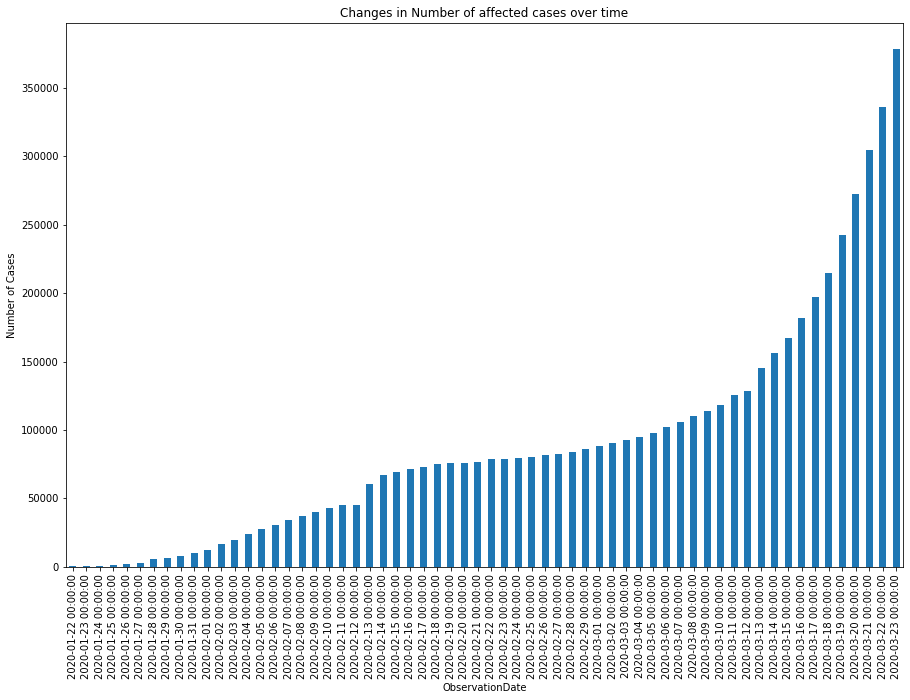

In [235]:
plt.figure(figsize=(15,10))
plt.title('Changes in Number of affected cases over time')
plt.xlabel('TIME')
plt.ylabel('Number of Cases')
query_01.plot(kind='bar', stacked = True)

# (2) Changes in cases over time at country level 

In [327]:
# plt.figure(figsize=(40,40))
query_02 = df.groupby(['Country/Region']).sum()

In [328]:
query_02.reset_index(inplace=True)

In [329]:
query_02

,Country/Region,SNo,Confirmed,Deaths,Recovered
0,Azerbaijan,2664,1.0,0.0,0.0
1,"('St. Martin',)",4675,2.0,0.0,0.0
2,Afghanistan,138020,289.0,2.0,8.0
3,Albania,94572,728.0,21.0,6.0
4,Algeria,134564,1221.0,94.0,302.0
...,...,...,...,...,...
198,Venezuela,70994,399.0,0.0,30.0
199,Vietnam,169587,1562.0,0.0,585.0
200,Zambia,47738,14.0,0.0,0.0
201,Zimbabwe,34085,10.0,1.0,0.0


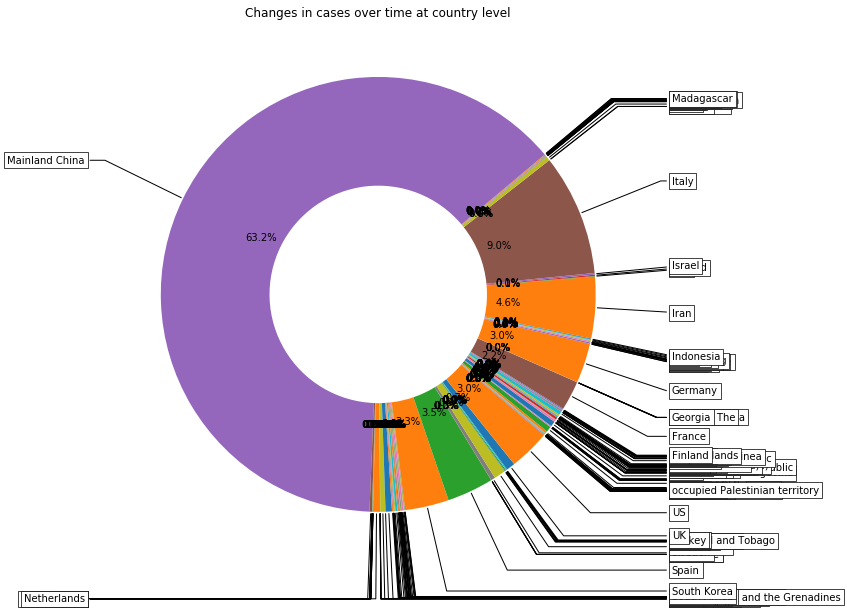

In [313]:
# Plot
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(aspect="equal"))
# plt.figure(figsize=(20,10) )
# plt.title('Changes in cases over time at country level')

wedges, texts, c= ax.pie(query_02['Confirmed'], autopct='%1.1f%%', wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(query_02['Country/Region'][i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("Changes in cases over time at country level")

plt.show()

# (3) Latest Number of affected cases 

In [122]:
df.columns

Index(['Province/State', 'Country/Region', 'Last Update', 'Confirmed',
       'Deaths', 'Recovered'],
      dtype='object')

In [248]:
df['Last Update'] = pd.to_datetime(df['Last Update'])

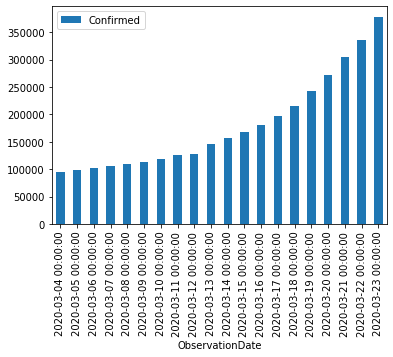

In [249]:
df.Confirmed.resample('D').sum().to_frame().tail(20).plot(kind='bar')

# (4) Country wise reported death cases till latest date

In [255]:
query_04 = df.groupby('Country/Region').sum()

In [258]:
query_04

,Confirmed,Deaths,Recovered
Country/Region,,,
Azerbaijan,1.0,0.0,0.0
"('St. Martin',)",2.0,0.0,0.0
Afghanistan,289.0,2.0,8.0
Albania,728.0,21.0,6.0
Algeria,1221.0,94.0,302.0
...,...,...,...
Venezuela,399.0,0.0,30.0
Vietnam,1562.0,0.0,585.0
Zambia,14.0,0.0,0.0


In [259]:
query_04.reset_index(inplace=True)

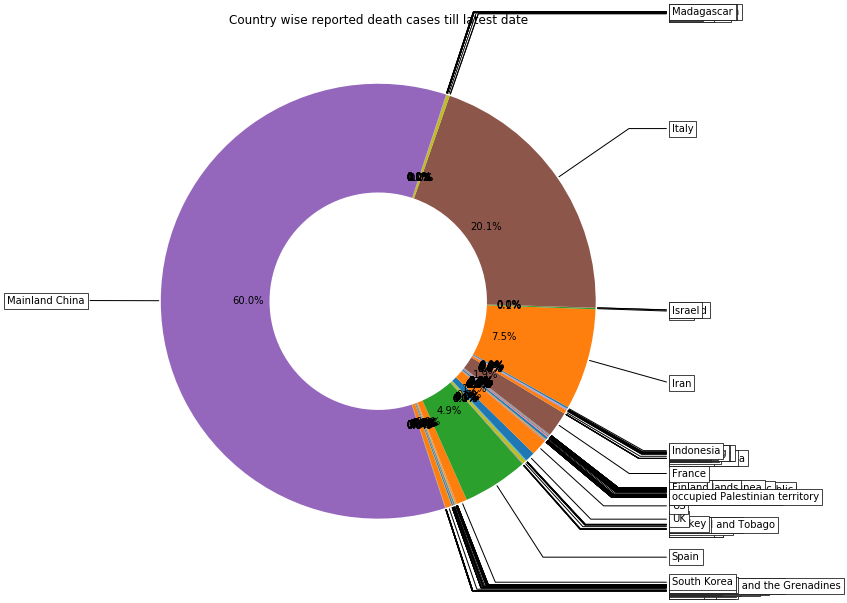

In [314]:
# Plot
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(aspect="equal"))
# plt.figure(figsize=(20,10) )
# plt.title('Changes in cases over time at country level')

wedges, texts, c= ax.pie(query_04['Deaths'], autopct='%1.1f%%', wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(query_04['Country/Region'][i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("Country wise reported death cases till latest date")

plt.show()

# Country wise recovered cases till latest date

In [263]:
query_05 = df.groupby('Country/Region').sum()

In [266]:
query_05

,Confirmed,Deaths,Recovered
Country/Region,,,
Azerbaijan,1.0,0.0,0.0
"('St. Martin',)",2.0,0.0,0.0
Afghanistan,289.0,2.0,8.0
Albania,728.0,21.0,6.0
Algeria,1221.0,94.0,302.0
...,...,...,...
Venezuela,399.0,0.0,30.0
Vietnam,1562.0,0.0,585.0
Zambia,14.0,0.0,0.0


In [269]:
query_05.reset_index(inplace=True)

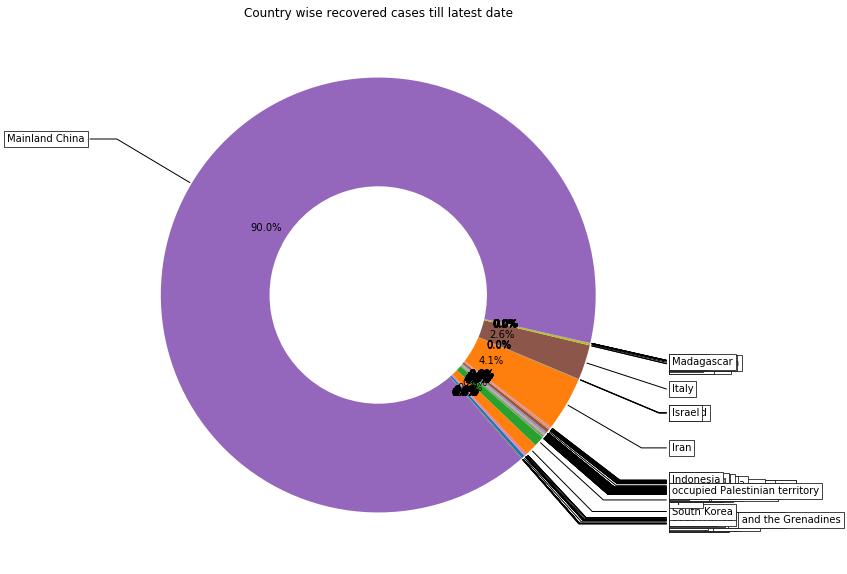

In [316]:
# Plot
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(aspect="equal"))
# plt.figure(figsize=(20,10) )
# plt.title('Changes in cases over time at country level')

wedges, texts, c= ax.pie(query_05['Recovered'], autopct='%1.1f%%', wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(query_05['Country/Region'][i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("Country wise recovered cases till latest date")

plt.show()